In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input , Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
SEED_VALUE = 42

# fix seed to make training deterministic
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [6]:
# load the boston_housing data set

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape)
print("\n")
print("Input features: ", x_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [8]:
boston_features = {
    "Average Number of Rooms": 5,
}

x_train_1d = x_train[:, boston_features["Average Number of Rooms"]]
print(x_train_1d.shape)

x_test_1d = x_test[:, boston_features["Average Number of Rooms"]]

(404,)


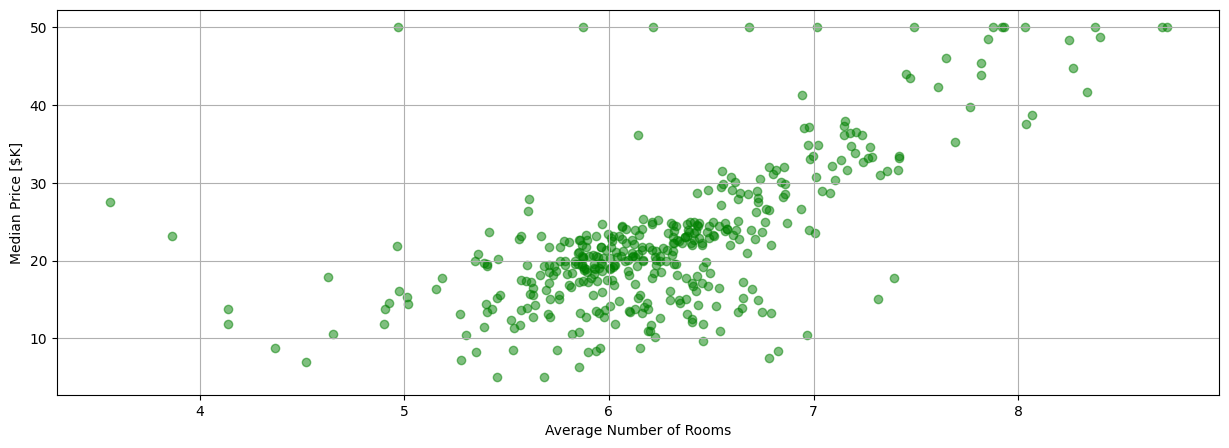

In [9]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(x_train_1d[:], y_train, color="green", alpha=0.5)

In [10]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [12]:
history = model.fit(
    x_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 206.3128 - val_loss: 280.9217
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 186.9886 - val_loss: 262.8025
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 172.6052 - val_loss: 246.1098
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.3462 - val_loss: 230.3333
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146.9325 - val_loss: 215.4011
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 135.3222 - val_loss: 201.3008
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.5055 - val_loss: 188.0288
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114.4768 - val_loss: 175.5821
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.2304 - val_loss: 163.9579
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96.7596 - val_loss: 153.1525
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.0562 - val_loss: 143.1616
Epoch 12/101
18/18 ━

In [13]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

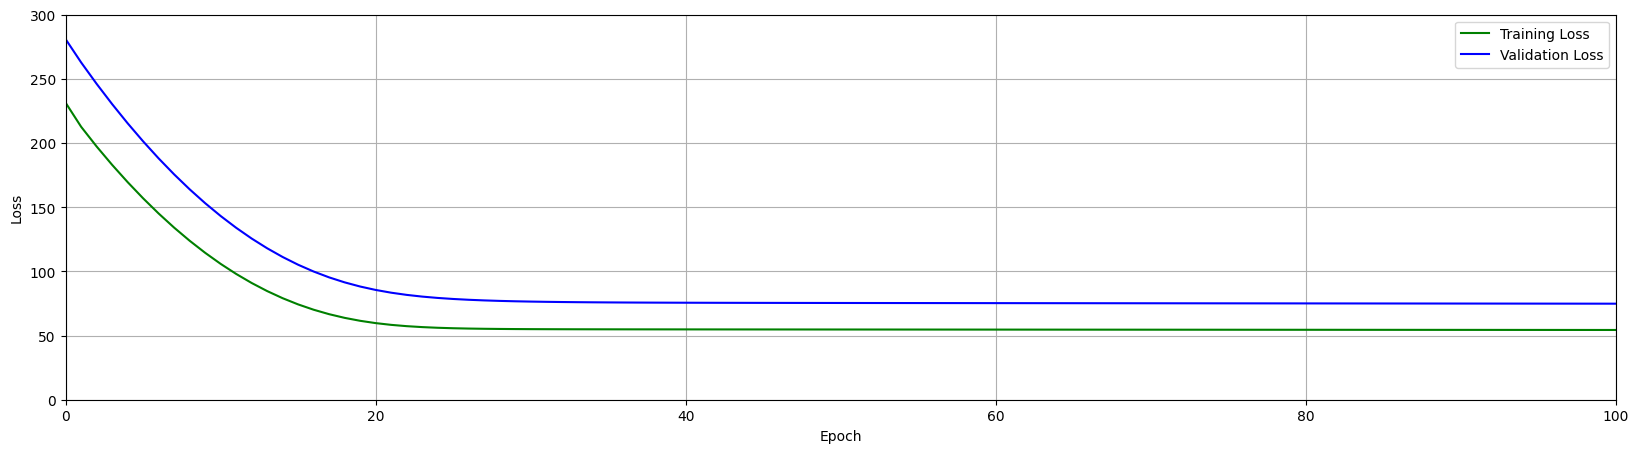

In [14]:
plot_loss(history)

In [16]:
import numpy as np # Import the NumPy library

# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = np.array([3, 4, 5, 6, 7]) # Convert the list x to a NumPy array
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted price of a home with 3 rooms: $11.2K
Predicted price of a home with 4 rooms: $14.6K
Predicted price of a home with 5 rooms: $17.9K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


<ipython-input-16-14d0bd1cfbf2>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")


In [17]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
